# MLP AND Operation
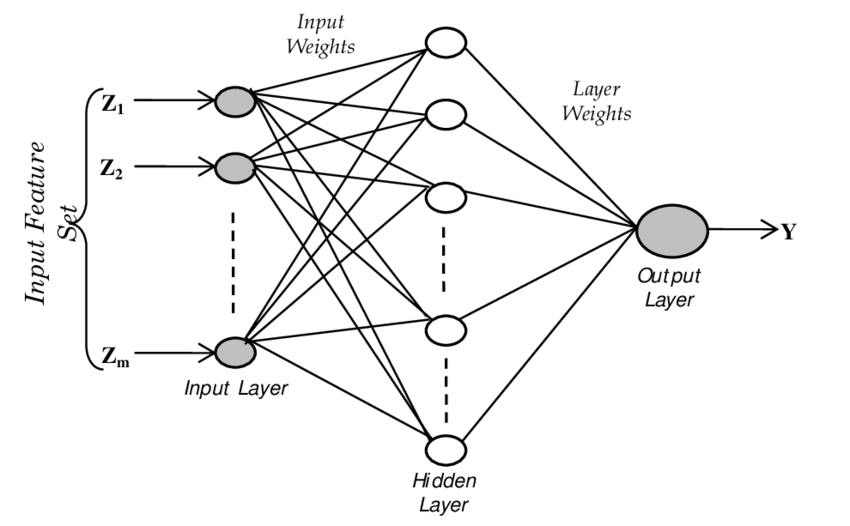

In [ ]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output dataset
y = np.array([[0], [0], [0], [1]])

# Set random seed value
np.random.seed(0)

# Initialize weights randomly with mean 0
input_size = 2      # two inputs
hidden_size = 4     # four hidden layer
output_size = 1     # one output

# Weights for the input layer to hidden layer
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))

# Weights for the hidden layer to output layer
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))

# Learning rate
learning_rate = 0.1

# Training the MLP
epochs = 10000

for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output
    #print("Epoch: {0} ---- Error: {1}".format(epoch, error))

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update the weights
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

# Print the final output
print("Output after training:")
print(output_layer_output)

# Test the network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = np.round(sigmoid(np.dot(sigmoid(np.dot(test_input, weights_input_hidden)), weights_hidden_output)))
print("\nPredicted output for test inputs:")
print(predicted_output)


Output after training:
[[0.00175866]
 [0.03550553]
 [0.03294133]
 [0.94829264]]

Predicted output for test inputs:
[[0.]
 [0.]
 [0.]
 [1.]]
